<a href="https://colab.research.google.com/github/Manasi758/TCS-iON-Rio-125-Forecasting-System/blob/main/Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings('ignore')





# Importing Dataset

In [ ]:
sales=pd.read_csv("C:/Users/Delll/Downloads/train.csv")

In [ ]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Shape of data

In [ ]:
sales.shape

(9800, 18)

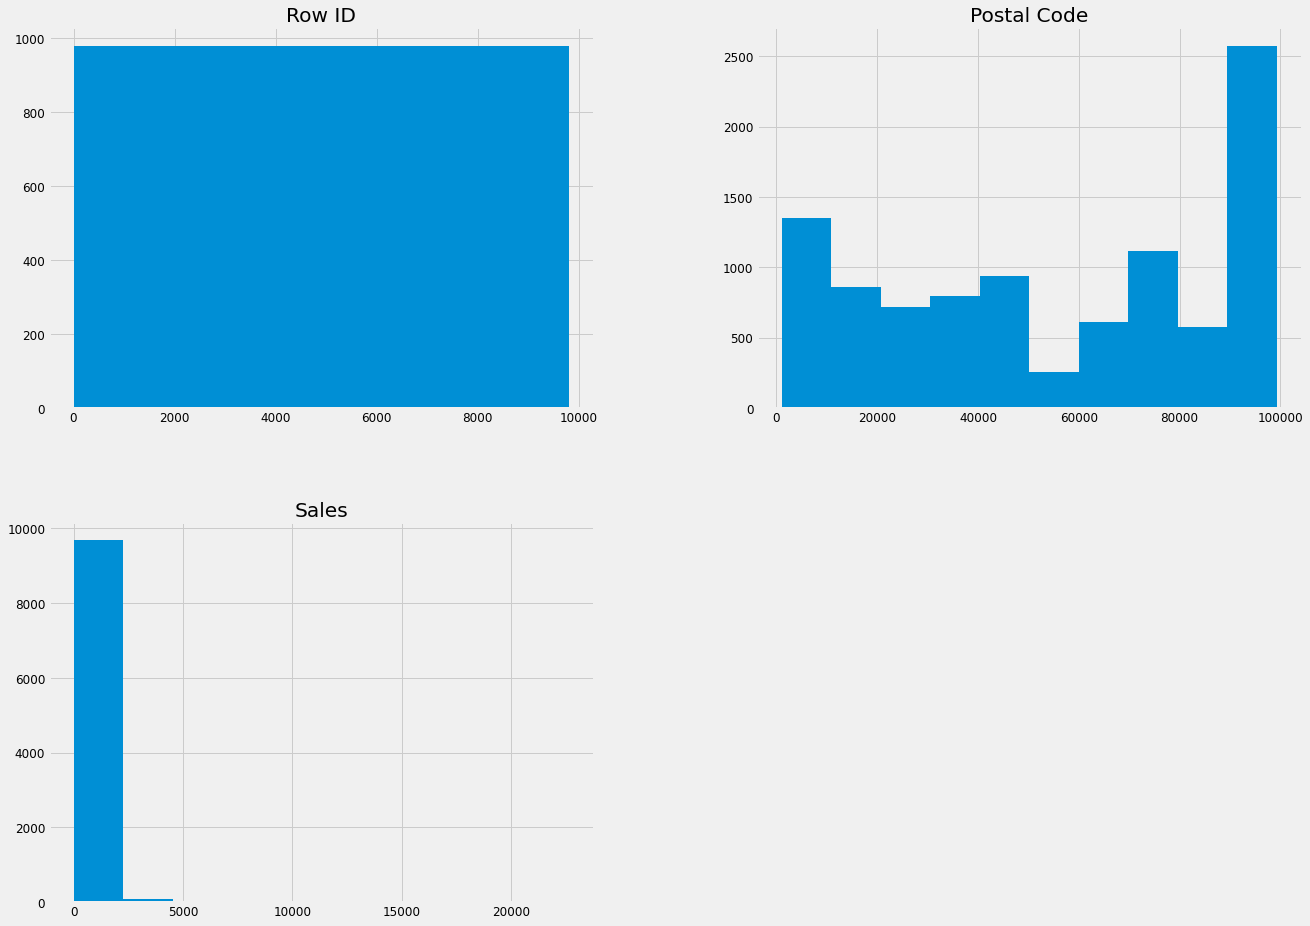

In [ ]:
sales.hist(figsize = (20,15))
plt.show()


In [ ]:
sales.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Describe the dataset

In [ ]:
sales.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
sales.corr()

,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,0.001151
Postal Code,0.013645,1.000000,-0.024067
Sales,0.001151,-0.024067,1.000000


# Checking rows with null values

In [ ]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
sales.dropna(inplace = True)
sales.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
sales.Category.unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
sales.Category.value_counts()


Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64

In [ ]:
# Extract the data of Office Supplies
office_supplies = sales.loc[sales['Category'] == 'Office Supplies']

In [ ]:
office_supplies['Order Date'].min(), office_supplies['Order Date'].max()


('01-01-2018', '31-12-2017')

# DATA PREPROCESSING

In [ ]:
office_supplies = office_supplies[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,12-06-2017,14.620
4,11-10-2016,22.368
6,09-06-2015,7.280
8,09-06-2015,18.504
9,09-06-2015,114.900


In [ ]:
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,01-01-2018,506.338
1,01-02-2017,161.970
2,01-03-2015,303.216
3,01-03-2016,117.600
4,01-03-2017,389.300


# Indexing with the time series data¶


In [ ]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,Sales
Order Date,
01-01-2018,506.338
01-02-2017,161.970
01-03-2015,303.216
01-03-2016,117.600
01-03-2017,389.300


In [ ]:
office_supplies.index


Index(['01-01-2018', '01-02-2017', '01-03-2015', '01-03-2016', '01-03-2017',
       '01-04-2015', '01-04-2017', '01-04-2018', '01-05-2016', '01-05-2017',
       ...
       '31-08-2016', '31-08-2017', '31-08-2018', '31-10-2015', '31-10-2016',
       '31-10-2017', '31-10-2018', '31-12-2015', '31-12-2016', '31-12-2017'],
      dtype='object', name='Order Date', length=1142)

In [ ]:
monthly = office_supplies['Sales'].resample("MS").mean()
monthly

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

# VISUALIZING TIME SERIES DATA

In [ ]:
monthly.plot(figsize = (16, 7))
plt.show()


AttributeError: 'float' object has no attribute 'plot'

The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

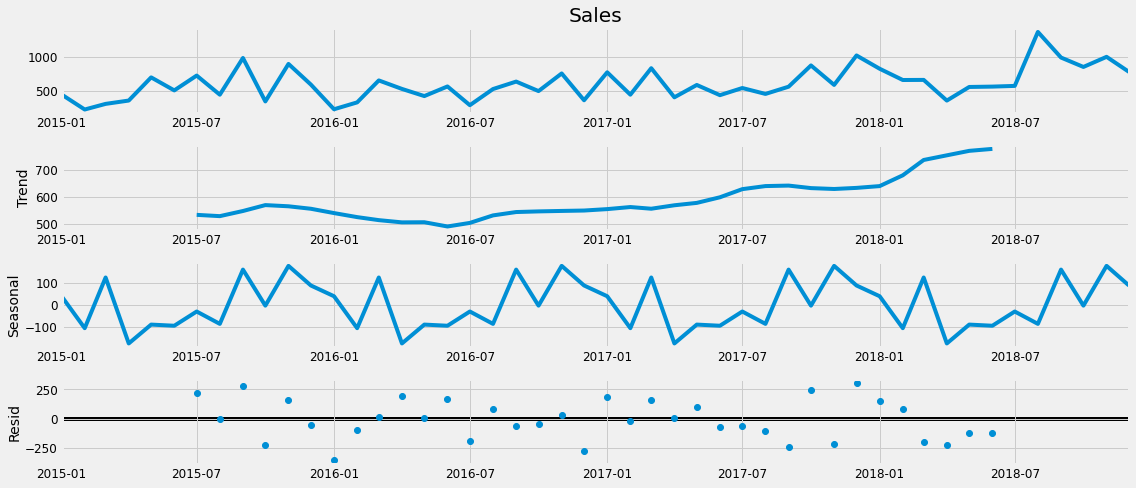

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

The figure above clearly shows the seasonality in our data, and the trend is gradually increasing through the years.



In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter selection for our Office Supplies sales ARIMA Time Series Model. Our goal here is to use a "grid search" to find the optimal set of parameters that yields the best performance for our model.



In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:744.6891852854232
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1232.7017020307
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.86445346570383
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:331.22059140386796
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.6012608980266
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1356.409763910071
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.33220590687057
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:332.27033837515245
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:704.9619666493292
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2589.2422193446737
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:489.43330124915855
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.20513946671787
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:518.3976271768344
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2536.6328298506505
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:348.54812798820154
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.2956548787284
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:659.3284972983703
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1446.1479926739948
AR

Using parameter with least value

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0025      0.243      0.010      0.992      -0.473       0.478
ma.L1         -1.0000      0.274     -3.651      0.000      -1.537      -0.463
ar.S.L12      -0.3321      0.324     -1.024      0.306      -0.968       0.303
sigma2      7.392e+04   3.71e-06   1.99e+10      0.000    7.39e+04    7.39e+04


# Validating Forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

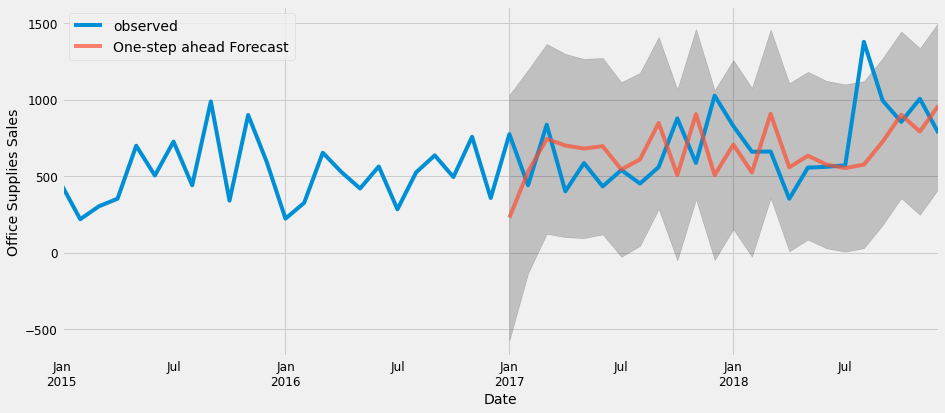

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

The grey area shows the confidence interval.

In [ ]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 85038.1


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 291.61


The Root Mean Squared Error (RMSE) shows that our model was able to predict the average daily Office Supplies Sales in the test set within 291.6 of the real sales. Our Office Supplies daily sales range from around 50 to 1350. So, our model works pretty well so far.

# Producting and Visualizing Forecasts¶


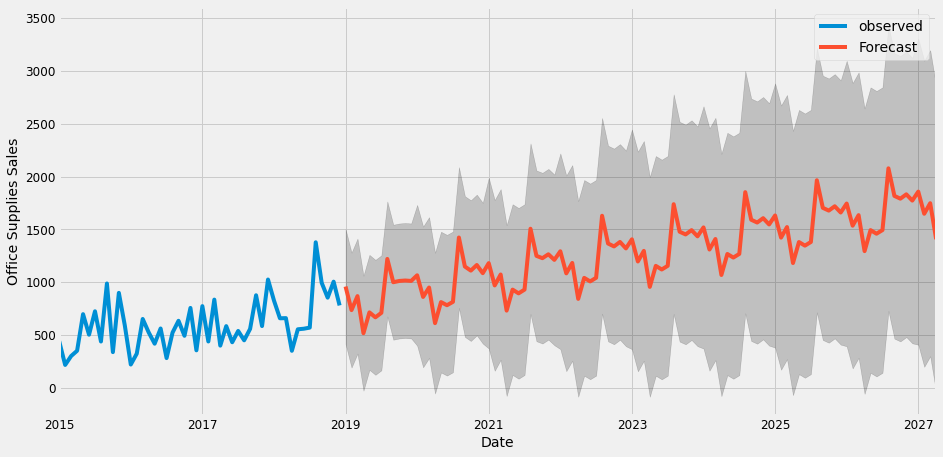

In [ ]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

Our ARIMA prediction model clearly captured the office supplies sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our predicted values (the expansion of the grey area).

The above time series analysis for Office Supplies makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of office supplies and furniture.

# Time Series of Office Supplies vs. Furniture
According to our data, the size of Office Supplies is much larger than the size of Furniture.



In [ ]:


furniture = sales.loc[sales['Category'] == 'Furniture']
furniture = furniture[['Order Date', 'Sales']]
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2015-01-03,1893.995
2015-01-06,2024.060
2015-01-08,44.128
2015-01-11,31.680
2015-01-12,4513.606


In [ ]:
monthly_office = monthly
monthly_furniture = furniture['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':monthly_furniture.index, 'Sales':monthly_furniture.values})
office = pd.DataFrame({'Order Date': monthly_office.index, 'Sales': monthly_office.values})

store = furniture.merge(office, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2015-01-01,924.024462,442.918737
1,2015-02-01,248.475714,218.343909
2,2015-03-01,778.884778,302.427250
3,2015-04-01,525.167692,352.387750
4,2015-05-01,390.457467,698.627304


# Visualizing the Sales Data¶


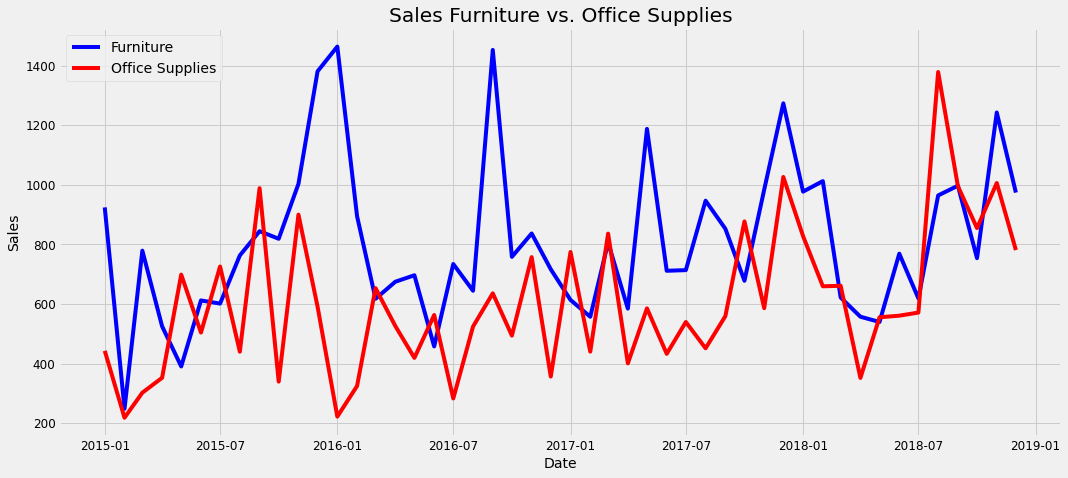

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'Furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Furniture vs. Office Supplies')
plt.legend()
plt.show()

# Time Series Modeling with Prophet
Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

Let's take look at the Prophet forcasting models for Furniture and Office Supplies Sales.

19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing
19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:58 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1152x504 with 0 Axes>

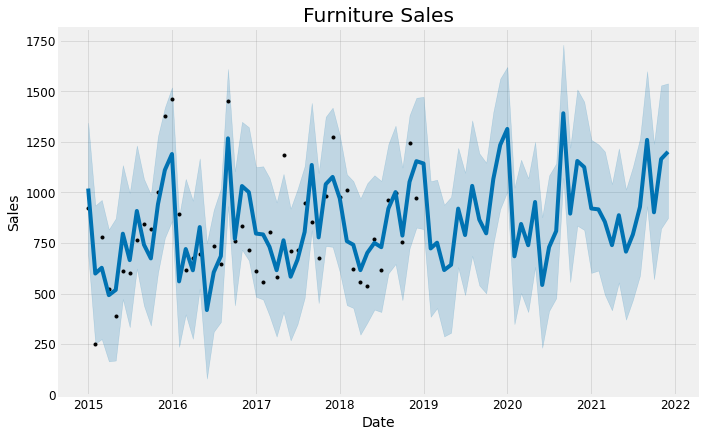

In [ ]:
from prophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

furniture_forecast = furniture_model.make_future_dataframe(periods = 36, freq = 'MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods = 36, freq = 'MS')
office_forecast = office_model.predict(office_forecast)

plt.figure(figsize = (16,7))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

<Figure size 1152x504 with 0 Axes>

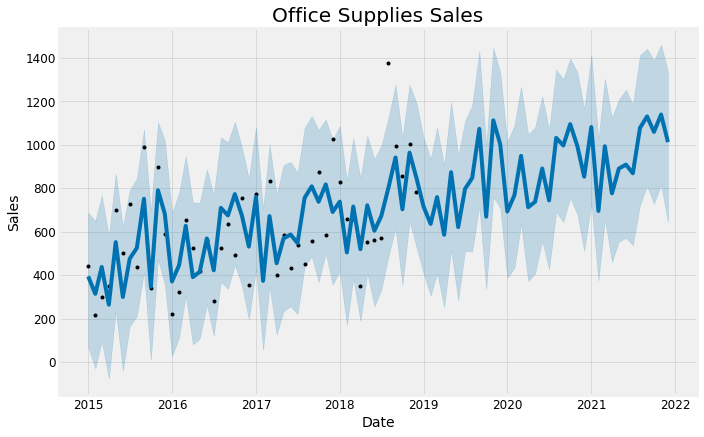

In [ ]:
plt.figure(figsize = (16,7))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')

plt.title('Office Supplies Sales')
plt.show()

# Compare the Two Forecasts
We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.

In [ ]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast,
                   how = 'inner', left_on = 'furniture_ds',
                   right_on = 'office_ds')

forecast = forecast.rename(columns = {'furniture_ds': 'Date'}).drop('office_ds', axis = 1)

forecast.head()


,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat,office_trend,office_yhat_lower,office_yhat_upper,office_trend_lower,office_trend_upper,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2015-01-01,736.965966,691.770480,1345.002146,736.965966,736.965966,282.567670,282.567670,282.567670,282.567670,282.567670,282.567670,0.0,0.0,0.0,1019.533636,457.756163,69.503453,688.696599,457.756163,457.756163,-62.931792,-62.931792,-62.931792,-62.931792,-62.931792,-62.931792,0.0,0.0,0.0,394.824370
1,2015-02-01,739.599541,252.041757,935.710345,739.599541,739.599541,-140.378066,-140.378066,-140.378066,-140.378066,-140.378066,-140.378066,0.0,0.0,0.0,599.221475,464.580145,-28.103746,650.096197,464.580145,464.580145,-149.844740,-149.844740,-149.844740,-149.844740,-149.844740,-149.844740,0.0,0.0,0.0,314.735404
2,2015-03-01,741.978254,275.357676,963.087783,741.978254,741.978254,-114.272731,-114.272731,-114.272731,-114.272731,-114.272731,-114.272731,0.0,0.0,0.0,627.705524,470.743741,96.307583,767.569658,470.743741,470.743741,-32.489595,-32.489595,-32.489595,-32.489595,-32.489595,-32.489595,0.0,0.0,0.0,438.254146
3,2015-04-01,744.611830,165.203469,817.271921,744.611830,744.611830,-252.357755,-252.357755,-252.357755,-252.357755,-252.357755,-252.357755,0.0,0.0,0.0,492.254074,477.567723,-75.282883,579.290847,477.567723,477.567723,-212.724187,-212.724187,-212.724187,-212.724187,-212.724187,-212.724187,0.0,0.0,0.0,264.843535
4,2015-05-01,747.160451,169.009445,871.832852,747.160451,747.160451,-228.882749,-228.882749,-228.882749,-228.882749,-228.882749,-228.882749,0.0,0.0,0.0,518.277702,484.171576,239.033877,868.206759,484.171576,484.171576,68.541160,68.541160,68.541160,68.541160,68.541160,68.541160,0.0,0.0,0.0,552.712736


# Trend and Forecast Visualization¶


No handles with labels found to put in legend.


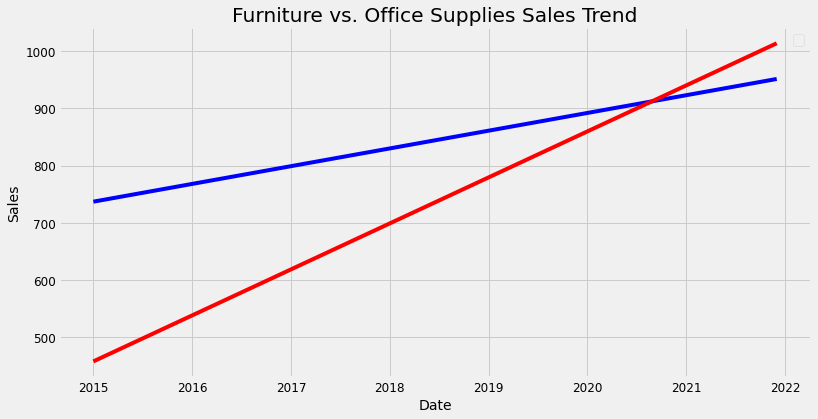

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(forecast['Date'], forecast['furniture_trend'],'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');
plt.show()


No handles with labels found to put in legend.


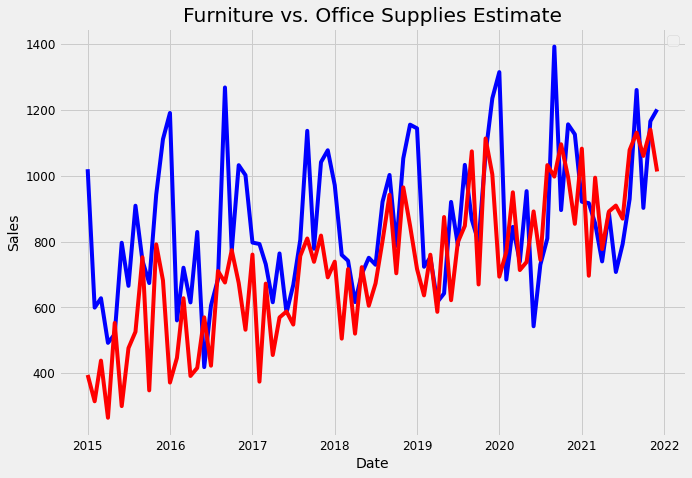

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

# Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

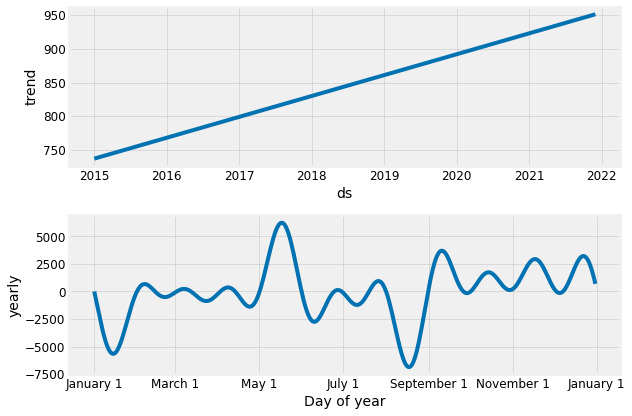

In [ ]:
furniture_model.plot_components(furniture_forecast)
plt.show()


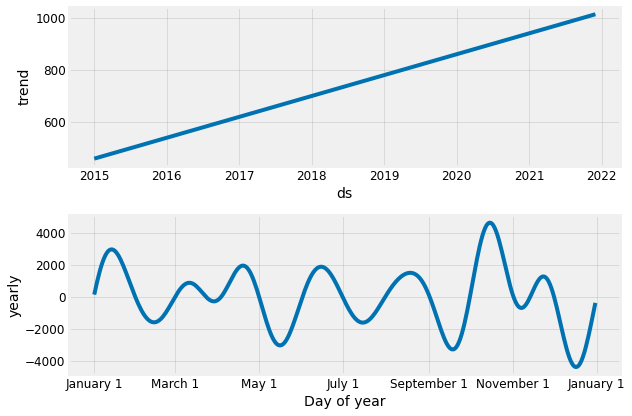

In [ ]:
office_model.plot_components(office_forecast)
plt.show()

Good to see that the sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger.